This notebook is used for analysis of the bftt species composition sims. Should also be able to be repurposed for the multispecies stuff

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
from itertools import cycle
import matplotlib.gridspec as gridspec
import glob
import collections
import math
import re
import os

In [6]:
nRuns = 100 #reduced to 10 for now to speed things up (nRuns is the no. of files we load into the notebook)
duration = 100.
nSamples = 50

#these durations are used for the second batch of runs, where phase_4 was run for longer to get
#more comparative results for the plots of things vs N_bacteria
duration_phase2 = 100.
nSamples_phase2 = 50
duration_phase4 = 300.
nSamples_phase4 = 150

phase2_filepath = "speciesComp-phase2-fixedImm/geno_distbs"
phase4_filepath = "speciesComp-phase4-fixedImm/geno_distbs"

phase2_bigK_filepath = "speciesComp-phase2-fixedImm-bigK-morePrecise/geno_distbs"
phase4_bigK_filepath = "speciesComp-phase4-fixedImm-bigK-morePrecise/geno_distbs"

'''currently redoing these, but with phase4 having a duration of 300 and 150 samples'''

'currently redoing these, but with phase4 having a duration of 300 and 150 samples'

In [25]:
# def get_numbers_from_filename(filename):
#     return re.search(r'(\d+(?:\.\d+)?)', filename).group(0)

# for filename in os.listdir(phase4_bigK_filepath+"/runID_0"):
#     #time_list = 
#     print("{:.2f}".format(float(get_numbers_from_filename(filename))))

In [33]:
def getListOfMeasurementTimes(directory_name):
    '''
    for each runID directory, this gets the filenames and extracts a list of the times they were sampled at.
    directory_name is of form path_to_files/runID_<n>
    
    returns: sorted list of the time vals, in string form with 2 decimal places
    '''
    time_list = []
    def get_numbers_from_filename2(filename):
        return re.search(r'(\d+(?:\.\d+)?)', filename).group(0)
    
#     for filename in os.listdir(directory_name): 
#         time_list.append(get_numbers_from_filename(directory_name))
        
#     print(time_list)
    for filename in os.listdir(directory_name):
        time_list.append(float(get_numbers_from_filename(filename)))
        #print("{:.2f}".format(float(get_numbers_from_filename2(filename))))
    
    #print(sorted(time_list))
    return ["{:.2f}".format(float(t)) for t in sorted(time_list)]
    
    
    
    
foo = getListOfMeasurementTimes(phase4_bigK_filepath+"/runID_0")
print(foo)

['0.00', '2.00', '4.00', '6.10', '8.10', '10.10', '12.05', '14.10', '16.02', '18.03', '20.03', '22.03', '24.03', '26.08', '28.03', '30.08', '32.05', '34.05', '36.00', '38.08', '40.03', '42.05', '44.00', '46.00', '48.00', '50.03', '52.05', '54.00', '56.05', '58.00', '60.05', '62.05', '64.05', '66.00', '68.00', '70.00', '72.02', '74.07', '76.10', '78.02', '80.02', '82.02', '84.05', '86.05', '88.05', '90.05', '92.05', '94.05', '96.02', '98.02', '100.05', '102.05', '104.05', '106.02', '108.07', '110.01', '112.04', '114.09', '116.01', '118.04', '120.01', '122.09', '124.05', '126.06', '128.01', '130.04', '132.01', '134.01', '136.06', '138.01', '140.09', '142.04', '144.01', '146.06', '148.02', '150.05', '152.04', '154.01', '156.01', '158.04', '160.01', '162.01', '164.06', '166.01', '168.05', '170.05', '172.01', '174.09', '176.05', '178.02', '180.09', '182.03', '184.04', '186.00', '188.00', '190.04', '192.00', '194.00', '196.00', '198.00', '200.05', '202.01', '204.08', '206.01', '208.00', '210

In [3]:
phase2_mh_times = pd.read_csv("speciesComp-phase2-fixedImm-bigK/rIm-0.5_rDet-0.25-microhabs_over_time.csv")
x = phase2_mh_times.values

phase2_mh_times = phase2_mh_times.drop(columns=['t'])
phase2_mh_times = phase2_mh_times.add_prefix("run_")
phase2_mh_times['avg_mh_t'] = phase2_mh_times.mean(axis=1)
phase2_mh_times['std_mh_t'] = phase2_mh_times.std(axis=1)
#phase2_mh_times

phase4_mh_times = pd.read_csv("speciesComp-phase4-fixedImm-bigK/rIm-0.5_rDet-1.0-microhabs_over_time.csv")
phase4_mh_times = phase4_mh_times.drop(columns=['t'])
phase4_mh_times = phase4_mh_times.add_prefix("run_")
phase4_mh_times['avg_mh_t'] = phase4_mh_times.mean(axis=1)
phase4_mh_times['std_mh_t'] = phase4_mh_times.std(axis=1)
#phase4_mh_times
# phase2_mh_times = phase2_mh_times.add_prefix("run_")

# phase2_mh_times.rename(columns={'run_t':'t'}, inplace=True)

# # new_header = phase2_mh_times.iloc[0] #grab the first row for the header
# # phase2_mh_times = phase2_mh_times[1:] #take the data less the header row
# # phase2_mh_times.columns = new_header #set the header row as the df header

x = x.flatten()
#x

In [4]:
def readGenoDistbsFromFile_v2(directoryPath, nRuns):
    '''
    This method reads in the geno distributions for each timestep for each run.
    Inside the geno_distbs directory there are directories for each of the runs, in the form runID_NN.
    Inside each of the runID directories there are several csv files, which contain the geno distributions over the microhabitats for several time samples.
    These geno distributions have the format of each line containing the genotypes present in each microhabitat.
    Each line is a seperate microhabitat, need to "transpose" the dataframe once it's read in.
    
    directoryPath is the path to the geno_distbs directory which contains all the runID directories
    
    Returns: a dictionary where each key is the run_ID, and each entry is another dictionary - 
    The keys in these subdictionaries are the time values, and the entries in these subdictionaries are dataframes with each column being the genotypes in each microhabitat.
    
    This method is an improved version of the earlier one.  This one lists through the times listed in the filenames, doesn't depend on duration or nSamples
    '''
    
    runID_dict = {} #dictionary containing all of the runs, the IDs are the keys
    
    #iterate over all the runs

In [4]:
def readGenoDistbsFromFile(filepath, nRuns, duration, nSamples):
    '''
    This method reads in the geno distributions for each timestep for each run.
    Inside the geno_distbs directory there are directories for each of the runs, in the for runID_NN.
    Inside each of the runID directories there are several csv files, which contain the geno distributions over the microhabitats for several time samples.
    These geno distributions have the format of each line containing the genotypes present in each microhabitat.
    Each line is a seperate microhabitat, need to "transpose" the dataframe once it's read in.
    
    Returns: a dictionary where each key is the run_ID, and each entry is another dictionary - 
    The keys in these subdictionaries are the time values, and the entries in these subdictionaries are dataframes with each column being the genotypes in each microhabitat.
    
    TODO - AS THERE MAY NOT BE 100 SAMPLES FOR SOME OF THESE, NEED TO FIGURE OUT HOW TO ITERATE THROUGH THE FILES IN THE FOLDER
    TODO - AND READ THEM DIRECTLY, THEN ALSO SAVE THE TIMES IN THE FILE NAMES AS THE TIME KEYS
    TODO - I THINK I DID THIS IN MY OLD MULTISPECIES ANALYSIS CODE
    '''
    
    interval = duration/nSamples #time between samples
    runID_dict = {} #dictionary containg all of the runs, the IDs are the keys
    
    #iterate over all the runs
    for rID in range(nRuns):
        runID_key = "runID_"+str(rID)
        print(runID_key)
        filepath_runID = filepath+"/"+runID_key
        time_dict = {} #dictionary containing geno dataframes for each timestep
        
        #iterate over all the times
        '''CUT OFF SOME OF THE LATER ONES HERE DUE TO SOME SIMULATIONS ENDING EARLY (THICKNESS LIMIT REACHED)'''
        for t in range(0, nSamples-4):
            
            time_val = interval*t
            #print(time_val)
            
            #need to use wildcard for the time, as the decimal values vary slightly between runs
            #glob helps with this
            time_key = "t="+str(int(time_val))
            filepath_time = filepath_runID+"/geno_distb-"+time_key+".*.csv"
            #print(filepath_time)
            
#             print(filepath_time)
            #print(glob.glob(filepath_time)[0])
            filename = glob.glob(filepath_time)[0]
            
            #need to swap the rows and columns so that the microhabitat is the key in the dataframe
            #geno_df = pd.read_csv(filename, header=None).T
            geno_df = pd.DataFrame([line.strip().split(',') for line in open(filename, 'r')]).T
            #geno
            new_header = geno_df.iloc[0] #grab the first row for the header
            geno_df = geno_df[1:] #take the data less the header row
            geno_df.columns = new_header #set the header row as the df header
            
            geno_df = geno_df.astype(float)
            
            time_dict[time_key] = geno_df
            
        
        runID_dict[runID_key] = time_dict
        
    return runID_dict
  

In [7]:
phase4_data = readGenoDistbsFromFile(phase4_bigK_filepath, nRuns, duration_phase4, nSamples_phase4)

runID_0


IndexError: list index out of range

In [ ]:
phase2_data = readGenoDistbsFromFile(phase2_bigK_filepath, nRuns=nRuns, duration=duration, nSamples=nSamples)

In [8]:
#testo["runID_0"]["t=0"]["mh_0"] = pd.to_numeric(testo["runID_0"]["t=0"]["mh_0"])
#phase2_data["runID_0"]['t=92'].keys()

KeyError: 't=92'

In [9]:
def getStandardDeviationOfInnerMicrohab(dataset):
    '''
    This takes in the big dataset of all the runs.
    Plots the standard deviation of the genotypes in microhabitat 0 over time for all the runs
    
    '''
    interval = duration/nSamples
    #microhab_key = "mh_0"
    for r in range(nRuns):
        
        run_key = "runID_"+str(r)
        geno_stDev = []
        times = []
        
        for t in range(4, nSamples-4):
            t_val = t*interval
            times.append(t_val)
            time_key = "t="+str(int(t_val))
            
            microhab_key = dataset[run_key][time_key].keys()[-1]
            #print(t_val)
            dataset[run_key][time_key][microhab_key] = pd.to_numeric(dataset[run_key][time_key][microhab_key])
            geno_stDev.append(dataset[run_key][time_key][microhab_key].std())
            
        plt.plot(times, geno_stDev)
    
    plt.show()
        
    

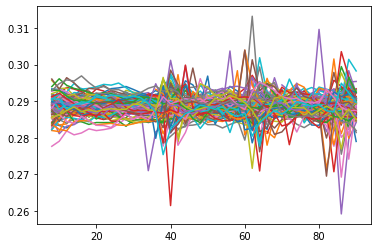

In [10]:
getStandardDeviationOfInnerMicrohab(phase4_data)

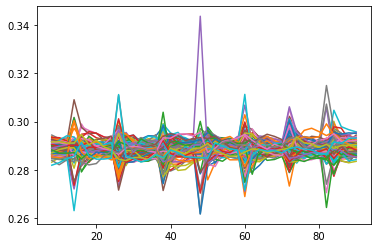

In [11]:
getStandardDeviationOfInnerMicrohab(phase2_data)

In [12]:
def getVarianceOverTime(phase2_data, phase4_data):
    '''
    Alternate version of plotting the variance of the populations for each parameter phase.
    Here for each timestep, we find the standard deviation of the geno distb in mh_0 of each run,
    then find the standard deviation of these standard deviations (call this V)
    
    we then plot V over time
    '''
    
    times = []
    V_phase_2 = []
    V_phase_4 = []
    
    interval = duration/nSamples
    microhab_key = "mh_0"
    
    for t in range(4, nSamples-4):
        t_val = t*interval
        times.append(t_val)
        time_key = "t="+str(int(t_val))
        
        phase2_stdev = []
        phase4_stdev = []
        
        for r in range(nRuns):
            run_key = "runID_"+str(r)
            phase2_data[run_key][time_key][microhab_key] = pd.to_numeric(phase2_data[run_key][time_key][microhab_key])
            phase4_data[run_key][time_key][microhab_key] = pd.to_numeric(phase4_data[run_key][time_key][microhab_key])
            
            phase2_stdev.append(phase2_data[run_key][time_key][microhab_key].std())
            phase4_stdev.append(phase4_data[run_key][time_key][microhab_key].std())
            
        
        V_phase_2.append(np.mean(np.array(phase2_stdev)))
        V_phase_4.append(np.mean(np.array(phase4_stdev)))
    
    
    plt.plot(times, V_phase_2, label="phase 2")
    plt.plot(times, V_phase_4, label="phase 4")
    plt.legend()
    plt.show()


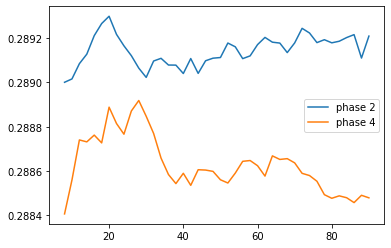

In [13]:
getVarianceOverTime(phase2_data=phase2_data, phase4_data=phase4_data)

In [14]:
def getStDevOfEdgeMicrohabitat(phase2_data, phase4_data):
    
    '''
    This takes in the big datasets for both of the parameter sets.
    
    For each timestep it gets the standard deviation of the edge microhabitat
    then plots the average of these for all the runs.
    
    For now, let's hope that the final key in the .keys() list is the edge microhabitat
    Can think of a better way to check later
    
    '''
    times = []
    V_phase_2 = []
    V_phase_4 = []
    
    interval = duration/nSamples
    
    for t in range(4, nSamples-4):
        t_val = t*interval
        times.append(t_val)
        time_key = "t="+str(int(t_val))
        
        phase2_stdev = []
        phase4_stdev = []
        
        for r in range(nRuns):
            run_key = "runID_"+str(r)
            
            p2_mh_key = phase2_data[run_key][time_key].keys()[-1] #gets the last key in the list of keys (hopefully it's the edge one)
            #print(p2_mh_key)
            p4_mh_key = phase4_data[run_key][time_key].keys()[-1] 
            
            phase2_stdev.append(np.nanstd(phase2_data[run_key][time_key][p2_mh_key]))
            phase4_stdev.append(np.nanstd(phase4_data[run_key][time_key][p4_mh_key]))

        
        V_phase_2.append(np.nanstd(np.array(phase2_stdev), ddof=1)/np.nanmean(np.array(phase2_stdev)))
        V_phase_4.append(np.nanstd(np.array(phase4_stdev), ddof=1)/np.nanmean(np.array(phase4_stdev)))

    
    plt.figure(figsize=(8,6))
    
    plt.plot(times, V_phase_2, label="phase 2", lw=2.4)
    plt.plot(times, V_phase_4, label="phase 4", lw=2.4)
    
    y2 = [0.02 for i in range(len(phase2_mh_times[:-1]))]
    y4 = [0.015 for i in range(len(phase4_mh_times[:]))]
    
    plt.plot(phase2_mh_times['avg_mh_t'][:-1], y2, "s", lw=4, markeredgewidth=1.5, markeredgecolor="k", label="phase2 new microhabs")
    plt.plot(phase4_mh_times['avg_mh_t'][:], y4, "s", lw=4, markeredgewidth=1.5, markeredgecolor="k", label="phase4 new microhabs")

    #plt.scatter(phase4_mh_times['avg_mh_t'][:-1], y4, lw=4, edgecolors='k', markeredgewidth=1.2)
    plt.xlabel("t", fontsize=18)
    plt.ylabel("CV(stDev)", fontsize=18)
    plt.title("variances of the edge microhabitat", fontsize=20)
    plt.legend()
    plt.savefig("edge_variances_bigK.pdf", bbox_inches="tight")
    plt.show()

/home/patrick/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


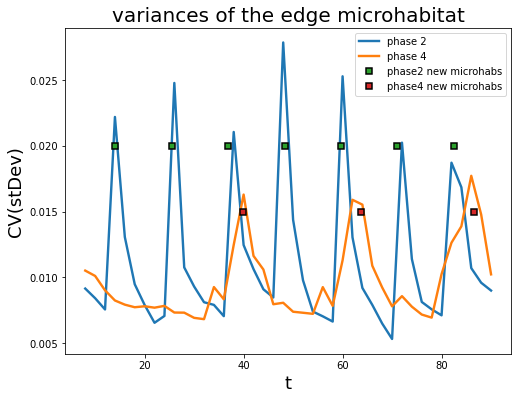

In [15]:
getStDevOfEdgeMicrohabitat(phase2_data=phase2_data, phase4_data=phase4_data)

In [29]:
def shannonIndexAndEquitabilityVsT(geno_data, duration, nSamples):
    '''
    rather than use the somewhat convoluted CV(V) method to quantify how the populations' diversities
    changed over time, we will instead use the Shannon index to measure the variance in the population's genotypes.
    
    This method finds the shannon index, H, of each population over time and returns the average of them
    Also does the same for the shannon equitability, E.
    E is defined as H/ln(S), where S is the no. of species.
    
    notes: can use df.values.flatten() to get all of the genotypes in an array.  Then remove any nans and collect like terms#
    '''
    
    times = []
    #H is the shannon index, S is the no. of species, E is the shannon equitability
    H_t = [] #shannon index over time
    E_t = [] #shannon equitability over time
    
    interval = duration/nSamples
    
    #can't quite remember why I don't start at t=0, but I'll assume there's a good reason for it
    for t in range(4, nSamples-4):
        
        t_val = t*interval
        times.append(t_val)
        time_key = "t="+str(int(t_val))
        
        H_list = []
        E_list = []
        
        
        for r in range(nRuns):
            run_key = "runID_"+str(r)
            
            #here we create an array with all the genotypes in it and remove any nans
            geno_vals = geno_data[run_key][time_key].values.flatten()[~np.isnan(geno_data[run_key][time_key].values.flatten())]
            nTot = geno_vals.size #total number of bacteria in the population
            genoCounts = collections.Counter(geno_vals) #number of members of each bacterial species in the system
            
            H = sum([-n/nTot*math.log(n/nTot) for _, n in genoCounts.items()]) #shannon index of this run at time t
            S = len(genoCounts.keys()) #no. of different species in the system
            E = H/math.log(S) #shannon equitability
            
            H_list.append(H) #collect all the values of H from all the runs at time t
            E_list.append(E)
            
        
        H_t.append(np.mean(np.array(H_list))) #find the average value of H at time t
        E_t.append(np.mean(np.array(E_list)))
    
    return times, H_t, E_t


In [30]:
t_phase2, H_vs_t_phase2, E_vs_t_phase2 = shannonIndexAndEquitabilityVsT(phase2_data, duration, nSamples)
t_phase4, H_vs_t_phase4, E_vs_t_phase4 = shannonIndexAndEquitabilityVsT(phase4_data, duration, nSamples)

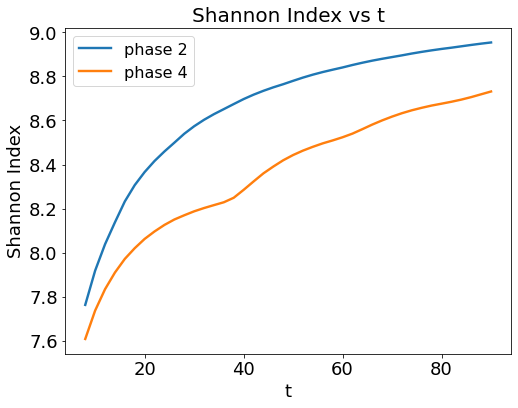

In [31]:
plt.figure(figsize=(8,6))

plt.plot(t, H_vs_t_phase2, label="phase 2", lw=2.4)
plt.plot(t, H_vs_t_phase4, label="phase 4", lw=2.4)

plt.xlabel("t", fontsize=18)
plt.ylabel("H", fontsize=18)
plt.title("Shannon Index vs t", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.savefig("shannon_index_vs_t.pdf", bbox_inches="tight")
plt.show()

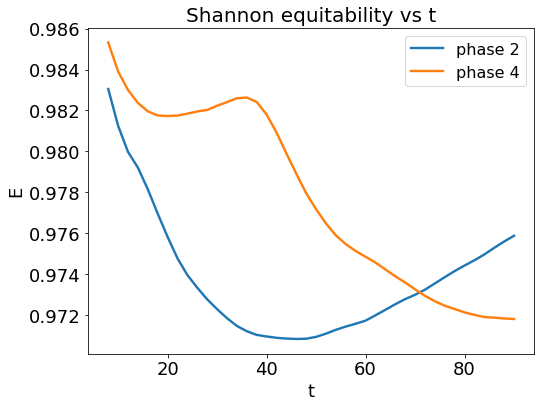

In [32]:
plt.figure(figsize=(8,6))

plt.plot(t, E_vs_t_phase2, label="phase 2", lw=2.4)
plt.plot(t, E_vs_t_phase4, label="phase 4", lw=2.4)

plt.xlabel("t", fontsize=18)
plt.ylabel("E", fontsize=18)
plt.title("Shannon equitability vs t", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.savefig("shannon_equitability_vs_t.pdf", bbox_inches="tight")
plt.show()

In [34]:
def shannonIndexAndEquitabilityVsN(geno_data, duration, nSamples):
    
    '''
    this method calculates the shannon index and shannon equitability vs N for all of the runs, and returns the average value
    shannon equitability is H/ln(S), where S is the no. of species present in the system
    
    args: 
    geno_data - dictionary of dictionaries of dataframes, contains all the genotypes of the bacteria over time, for each run
    '''
    
    nBac = [] #number of bacteria at each time
    times =[]
    #H is the shannon index, S is the no. of species, E is the shannon equitability
    '''need to refactor these names in the other methods too'''
    H_N = [] #shannon index as f(N)
    E_N = [] #shannon equitability as f(N) for the phase 2 parameters
    interval = duration/nSamples
    
    #can't quite remember why I don't start at t=0, but I'll assume there's a good reason for it
    for t in range(4, nSamples-4):
        
        t_val = t*interval
        times.append(t_val)
        time_key = "t="+str(int(t_val))
        
        H_list = [] 
        E_list = []
        nBac_list = []
        
        for r in range(nRuns):
            run_key = "runID_"+str(r)
            
            #here we create an array with all the genotypes in it and remove any nans
            geno_vals = geno_data[run_key][time_key].values.flatten()[~np.isnan(geno_data[run_key][time_key].values.flatten())]
            nTot = geno_vals.size #total number of bacteria in the population
            genoCounts = collections.Counter(geno_vals) #no. of occurrences of each genotype in the system
            
            #shannon index
            H = sum([-n/nTot*math.log(n/nTot) for _, n in genoCounts.items()])
            #no of species
            S = len(genoCounts.keys())
            #shannon equitability
            E = H/math.log(S)
            
            H_list.append(H) #collect all the values of H at time t
            E_list.append(E)
            nBac_list.append(nTot)
            
        
        H_N.append(np.mean(np.array(H_list))) #average value of H at time t
        E_N.append(np.mean(np.array(E_list)))
        nBac.append(np.mean(np.array(nBac_list)))
    
    return nBac, H_N, E_N

In [35]:
nBac_phase2, H_vs_N_phase2, E_vs_N_phase2 = shannonIndexAndEquitabilityVsN(phase2_data, duration, nSamples)
nBac_phase4, H_vs_N_phase4, E_vs_N_phase4 = shannonIndexAndEquitabilityVsN(phase4_data, duration, nSamples)

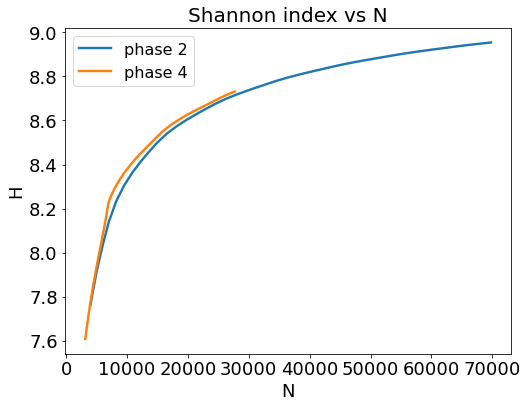

In [41]:
plt.figure(figsize=(8,6))

plt.plot(nBac_phase2, H_vs_N_phase2, label="phase 2", lw=2.4)
plt.plot(nBac_phase4, H_vs_N_phase4, label="phase 4", lw=2.4)

plt.xlabel("N", fontsize=18)
plt.ylabel("H", fontsize=18)
plt.title("Shannon index vs N", fontsize=20)
#plt.semilogy()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
#plt.savefig("shannon_index.pdf", bbox_inches="tight")
plt.show()

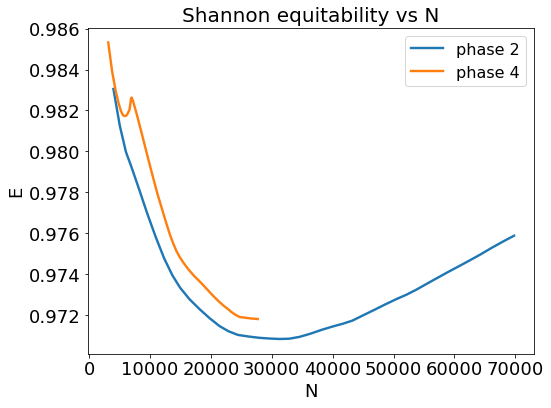

In [43]:
plt.figure(figsize=(8,6))

plt.plot(nBac_phase2, E_vs_N_phase2, label="phase 2", lw=2.4)
plt.plot(nBac_phase4, E_vs_N_phase4, label="phase 4", lw=2.4)

plt.xlabel("N", fontsize=18)
plt.ylabel("E", fontsize=18)
plt.title("Shannon equitability vs N", fontsize=20)
#plt.semilogy()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
#plt.savefig("shannon_index.pdf", bbox_inches="tight")
plt.show()

In [58]:
def shannonIndexAndEquitabilityVsT_EDGE(geno_data, duration, nSamples):
    '''
    shannon index and equitability over time, but just of the edge microhabitat
    '''
    
    times = []
    H_t_EDGE = [] #shannon index over time for the edge microhabitat
    E_t_EDGE = []
    interval = duration/nSamples
    
    #can't quite remember why I don't start at t=0, but I'll assume there's a good reason for it
    for t in range(4, nSamples-4):
        
        t_val = t*interval
        times.append(t_val)
        time_key = "t="+str(int(t_val))
        
        H_list_EDGE = [] 
        E_list_EDGE = []
        
        for r in range(nRuns):
            run_key = "runID_"+str(r)
            edge_mh_key = geno_data[run_key][time_key].keys()[-1] #gets the last key in the list of keys (hopefully it's the edge one)
            
            #here we create an array with all the genotypes in it and remove any nans
            geno_vals = geno_data[run_key][time_key][edge_mh_key].values.flatten()[~np.isnan(geno_data[run_key][time_key][edge_mh_key].values.flatten())]
            nTot = geno_vals.size #total number of bacteria in the population
            genoCounts = collections.Counter(geno_vals)
            
            if nTot == 0:
                H = np.nan
                E = np.nan
            else:
                H = sum([-n/nTot*math.log(n/nTot) for _, n in genoCounts.items()]) #shannon index of this run at time t
                S = len(genoCounts.keys()) #no. of different species in the system
                E = H/math.log(S) #shannon equitability
            
            H_list_EDGE.append(H) #collect all the values of H from all the runs at time t
            E_list_EDGE.append(E)
            
        H_t_EDGE.append(np.nanmean(np.array(H_list_EDGE))) #find the average value of H at time t
        E_t_EDGE.append(np.nanmean(np.array(E_list_EDGE)))
    
    
    return times, H_t_EDGE, E_t_EDGE

In [59]:
t_phase2_EDGE, H_vs_t_phase2_EDGE, E_vs_t_phase2_EDGE = shannonIndexAndEquitabilityVsT_EDGE(phase2_data, duration, nSamples)
t_phase4_EDGE, H_vs_t_phase4_EDGE, E_vs_t_phase4_EDGE = shannonIndexAndEquitabilityVsT_EDGE(phase4_data, duration, nSamples)

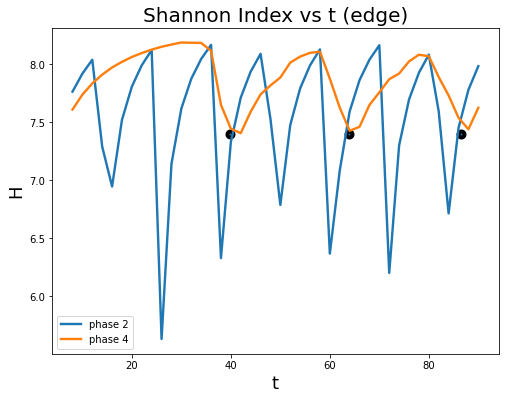

In [65]:
plt.figure(figsize=(8,6))

plt.plot(t_phase2_EDGE, H_vs_t_phase2_EDGE, label="phase 2", lw=2.4)
plt.plot(t_phase4_EDGE, H_vs_t_phase4_EDGE, label="phase 4", lw=2.4)

#     y2 = [0.02 for i in range(len(phase2_mh_times[:-1]))]
#     y4 = [0.015 for i in range(len(phase4_mh_times[:]))]

#     plt.plot(phase2_mh_times['avg_mh_t'][:-1], y2, "s", lw=4, markeredgewidth=1.5, markeredgecolor="k", label="phase2 new microhabs")
#     plt.plot(phase4_mh_times['avg_mh_t'][:], y4, "s", lw=4, markeredgewidth=1.5, markeredgecolor="k", label="phase4 new microhabs")

y4 = [7.4 for y in range(len(phase4_mh_times['avg_mh_t']))]

plt.scatter(phase4_mh_times['avg_mh_t'][:], y4[:], lw=4, edgecolors='k')
plt.xlabel("t", fontsize=18)
plt.ylabel("H", fontsize=18)
plt.title("Shannon Index vs t (edge)", fontsize=20)
plt.legend()
#plt.savefig("shannon_index.pdf", bbox_inches="tight")
plt.show()

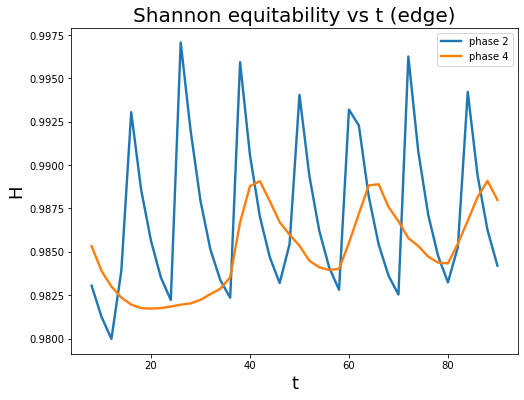

In [61]:
plt.figure(figsize=(8,6))

plt.plot(t_phase2_EDGE, E_vs_t_phase2_EDGE, label="phase 2", lw=2.4)
plt.plot(t_phase4_EDGE, E_vs_t_phase4_EDGE, label="phase 4", lw=2.4)

plt.xlabel("t", fontsize=18)
plt.ylabel("H", fontsize=18)
plt.title("Shannon equitability vs t (edge)", fontsize=20)
plt.legend()
#plt.savefig("shannon_index.pdf", bbox_inches="tight")
plt.show()

In [77]:
def shannonIndexAndEquitabilityVsN_EDGE(geno_data, duration, nSamples):
    
    '''
    this method calculates the shannon index and shannon equitability vs N for all of the runs, and returns the average value
    shannon equitability is H/ln(S), where S is the no. of species present in the system
    
    args: 
    geno_data - dictionary of dictionaries of dataframes, contains all the genotypes of the bacteria over time, for each run
    '''
    
    nBac = [] #number of bacteria at each time
    times =[]
    #H is the shannon index, S is the no. of species, E is the shannon equitability
    '''need to refactor these names in the other methods too'''
    H_N = [] #shannon index as f(N)
    E_N = [] #shannon equitability as f(N) for the phase 2 parameters
    interval = duration/nSamples
    
    #can't quite remember why I don't start at t=0, but I'll assume there's a good reason for it
    for t in range(4, nSamples-4):
        
        t_val = t*interval
        times.append(t_val)
        time_key = "t="+str(int(t_val))
        
        H_list = [] 
        E_list = []
        nBac_list = []
        
        for r in range(nRuns):
            run_key = "runID_"+str(r)
            edge_mh_key = geno_data[run_key][time_key].keys()[-1] #gets the last key in the list of keys (hopefully it's the edge one)
            
            #here we create an array with all the genotypes in it and remove any nans
            geno_vals = geno_data[run_key][time_key][edge_mh_key].values.flatten()[~np.isnan(geno_data[run_key][time_key][edge_mh_key].values.flatten())]
            nTot_edge = geno_vals.size #total number of bacteria in the population
            nTot = geno_data[run_key][time_key].values.flatten().size
            genoCounts = collections.Counter(geno_vals)
            
            if nTot_edge == 0:
                H = np.nan
                E = np.nan
            else:
                H = sum([-n/nTot*math.log(n/nTot) for _, n in genoCounts.items()]) #shannon index of this run at time t
                S = len(genoCounts.keys()) #no. of different species in the system
                E = H/math.log(S) #shannon equitability
            
            H_list.append(H) #collect all the values of H at time t
            E_list.append(E)
            nBac_list.append(nTot)
            
        
        H_N.append(np.nanmean(np.array(H_list))) #average value of H at time t
        E_N.append(np.nanmean(np.array(E_list)))
        nBac.append(np.mean(np.array(nBac_list)))
    
    return nBac, H_N, E_N

In [78]:
nBac_phase2_EDGE, H_vs_N_phase2_EDGE, E_vs_N_phase2_EDGE = shannonIndexAndEquitabilityVsN_EDGE(phase2_data, duration, nSamples)
nBac_phase4_EDGE, H_vs_N_phase4_EDGE, E_vs_N_phase4_EDGE = shannonIndexAndEquitabilityVsN_EDGE(phase4_data, duration, nSamples)

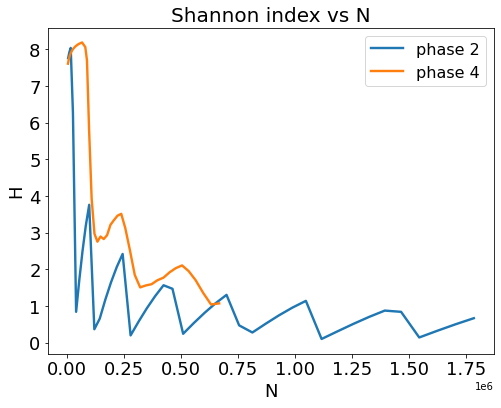

In [79]:
plt.figure(figsize=(8,6))

plt.plot(np.cumsum(nBac_phase2_EDGE), H_vs_N_phase2_EDGE, label="phase 2", lw=2.4)
plt.plot(np.cumsum(nBac_phase4_EDGE), H_vs_N_phase4_EDGE, label="phase 4", lw=2.4)

plt.xlabel("N", fontsize=18)
plt.ylabel("H", fontsize=18)
plt.title("Shannon index vs N", fontsize=20)
#plt.semilogy()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
#plt.savefig("shannon_index.pdf", bbox_inches="tight")
plt.show()

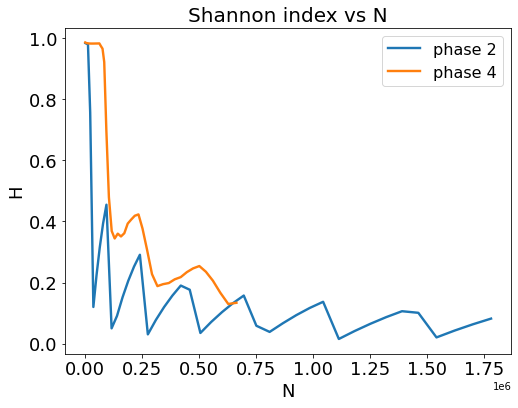

In [80]:
plt.figure(figsize=(8,6))

plt.plot(np.cumsum(nBac_phase2_EDGE), E_vs_N_phase2_EDGE, label="phase 2", lw=2.4)
plt.plot(np.cumsum(nBac_phase4_EDGE), E_vs_N_phase4_EDGE, label="phase 4", lw=2.4)

plt.xlabel("N", fontsize=18)
plt.ylabel("H", fontsize=18)
plt.title("Shannon equitability vs N", fontsize=20)
#plt.semilogy()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
#plt.savefig("shannon_index.pdf", bbox_inches="tight")
plt.show()

In [ ]:
testo = phase2_data['runID_3']['t=80']

y = phase2_data['runID_3']['t=80'].values.flatten()[~np.isnan(phase2_data['runID_3']['t=80'].values.flatten())]
z = collections.Counter(y)
S = [-n/nTot*math.log(n/nTot) for _, n in z.items()]
print(sum(S))

y4 = phase4_data['runID_3']['t=80'].values.flatten()[~np.isnan(phase4_data['runID_3']['t=80'].values.flatten())]
z4 = collections.Counter(y4)
S4 = [-n/nTot*math.log(n/nTot) for _, n in z4.items()]
print(sum(S4))

# testo_vals = testo.values.flatten()
# x = np.count_nonzero(np.isnan(testo_vals))
# testo_vals = testo_vals[~np.isnan(testo_vals)]
# testo_vals
# x = np.count_nonzero(np.isnan(testo_vals))
# nTot = y.size
# z = collections.Counter(y)
# r = z[0.5433]
# S = [n/nTot*math.log(n/nTot) for _, n in z.items()]
# sum(S)
